**Project - Predictive Modelling**

Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

In [1]:
# Importing the packages

# For Data Wrangling/ Data Processing
import numpy as np   
import pandas as pd    

# Data Visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
import matplotlib.style

# For Modeling 
from sklearn.linear_model import LinearRegression

# For checking errors
from sklearn import metrics
import statsmodels.api as sm

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

import statsmodels.stats.api as sms

In [2]:
df=pd.read_excel(r'C:\Users\dell\Downloads\compactiv.xlsx')

In [3]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [4]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [5]:
df_head1=df.head().style.background_gradient()
df_tail1=df.tail().style.background_gradient()
import dataframe_image as dfi
dfi.export(df_head1, 'df_head1.png',table_conversion="matplotlib")
dfi.export(df_tail1, 'df_tail1.png',table_conversion="matplotlib")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [7]:
df.isna().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [8]:
df.describe().round(2).T

count        mean        std     min        25%        50%  \
lread     8192.0       19.56      53.35     0.0        2.0        7.0   
lwrite    8192.0       13.11      29.89     0.0        0.0        1.0   
scall     8192.0     2306.32    1633.62   109.0     1012.0     2051.5   
sread     8192.0      210.48     198.98     6.0       86.0      166.0   
swrite    8192.0      150.06     160.48     7.0       63.0      117.0   
fork      8192.0        1.88       2.48     0.0        0.4        0.8   
exec      8192.0        2.79       5.21     0.0        0.2        1.2   
rchar     8088.0   197385.73  239837.49   278.0    34091.5   125473.5   
wchar     8177.0    95902.99  140841.71  1498.0    22916.0    46619.0   
pgout     8192.0        2.29       5.31     0.0        0.0        0.0   
ppgout    8192.0        5.98      15.21     0.0        0.0        0.0   
pgfree    8192.0       11.92      32.36     0.0        0.0        0.0   
pgscan    8192.0       21.53      71.14     0.0        0.0        0.0   
atch      8192.0        1.13       5.71     0.0        0.0        0.0   
pgin      8192.0        8.28      13.87     0.0        0.6        2.8   
ppgin     8192.0       12.39      22.28     0.0        0.6        3.8   
pflt      8192.0      109.79     114.42     0.0       25.0       63.8   
vflt      8192.0      185.32     191.00     0.2       45.4      120.4   
freemem   8192.0     1763.46    2482.10    55.0      231.0      579.0   
freeswap  8192.0  1328125.96  422019.43     2.0  1042623.5  1289289.5   
usr       8192.0       83.97      18.40     0.0       81.0       89.0   

                 75%         max  
lread          20.00     1845.00  
lwrite         10.00      575.00  
scall        3317.25    12493.00  
sread         279.00     5318.00  
swrite        185.00     5456.00  
fork            2.20       20.12  
exec            2.80       59.56  
rchar      267828.75  2526649.00  
wchar      106101.00  1801623.00  
pgout           2.40       81.44  
ppgout          4.20      184.20  
pgfree          5.00      523.00  
pgscan          0.00     1237.00  
atch            0.60      211.58  
pgin            9.76      141.20  
ppgin          13.80      292.61  
pflt          159.60      899.80  
vflt          251.80     1365.00  
freemem      2002.25    12027.00  
freeswap  1730379.50  2243187.00  
usr            94.00       99.00

In [9]:
df.shape

(8192, 22)

In [10]:
df.describe(include='all').round(2).T

count unique            top  freq        mean        std     min  \
lread     8192.0    NaN            NaN   NaN       19.56      53.35     0.0   
lwrite    8192.0    NaN            NaN   NaN       13.11      29.89     0.0   
scall     8192.0    NaN            NaN   NaN     2306.32    1633.62   109.0   
sread     8192.0    NaN            NaN   NaN      210.48     198.98     6.0   
swrite    8192.0    NaN            NaN   NaN      150.06     160.48     7.0   
fork      8192.0    NaN            NaN   NaN        1.88       2.48     0.0   
exec      8192.0    NaN            NaN   NaN        2.79       5.21     0.0   
rchar     8088.0    NaN            NaN   NaN   197385.73  239837.49   278.0   
wchar     8177.0    NaN            NaN   NaN    95902.99  140841.71  1498.0   
pgout     8192.0    NaN            NaN   NaN        2.29       5.31     0.0   
ppgout    8192.0    NaN            NaN   NaN        5.98      15.21     0.0   
pgfree    8192.0    NaN            NaN   NaN       11.92      32.36     0.0   
pgscan    8192.0    NaN            NaN   NaN       21.53      71.14     0.0   
atch      8192.0    NaN            NaN   NaN        1.13       5.71     0.0   
pgin      8192.0    NaN            NaN   NaN        8.28      13.87     0.0   
ppgin     8192.0    NaN            NaN   NaN       12.39      22.28     0.0   
pflt      8192.0    NaN            NaN   NaN      109.79     114.42     0.0   
vflt      8192.0    NaN            NaN   NaN      185.32      191.0     0.2   
runqsz      8192      2  Not_CPU_Bound  4331         NaN        NaN     NaN   
freemem   8192.0    NaN            NaN   NaN     1763.46     2482.1    55.0   
freeswap  8192.0    NaN            NaN   NaN  1328125.96  422019.43     2.0   
usr       8192.0    NaN            NaN   NaN       83.97       18.4     0.0   

                25%        50%        75%        max  
lread           2.0        7.0       20.0     1845.0  
lwrite          0.0        1.0       10.0      575.0  
scall        1012.0     2051.5    3317.25    12493.0  
sread          86.0      166.0      279.0     5318.0  
swrite         63.0      117.0      185.0     5456.0  
fork            0.4        0.8        2.2      20.12  
exec            0.2        1.2        2.8      59.56  
rchar       34091.5   125473.5  267828.75  2526649.0  
wchar       22916.0    46619.0   106101.0  1801623.0  
pgout           0.0        0.0        2.4      81.44  
ppgout          0.0        0.0        4.2      184.2  
pgfree          0.0        0.0        5.0      523.0  
pgscan          0.0        0.0        0.0     1237.0  
atch            0.0        0.0        0.6     211.58  
pgin            0.6        2.8       9.76      141.2  
ppgin           0.6        3.8       13.8     292.61  
pflt           25.0       63.8      159.6      899.8  
vflt           45.4      120.4      251.8     1365.0  
runqsz          NaN        NaN        NaN        NaN  
freemem       231.0      579.0    2002.25    12027.0  
freeswap  1042623.5  1289289.5  1730379.5  2243187.0  
usr            81.0       89.0       94.0       99.0

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),'=== ',df[column].nunique())
        print(df[column].value_counts().sort_values(ascending=False))
        print('\n')

RUNQSZ ===  2
Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64




## Converting categorical to dummy variables

In [12]:
## Here we are converting sub-groups/ classes into numbers(0 or 1). This is done as algorithm takes only numbers or its a pre-requisite to run a algorithm
## Drop first will ensure redundancy is removed. For multiple class, It also removes multicollinearity(if any)
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [13]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

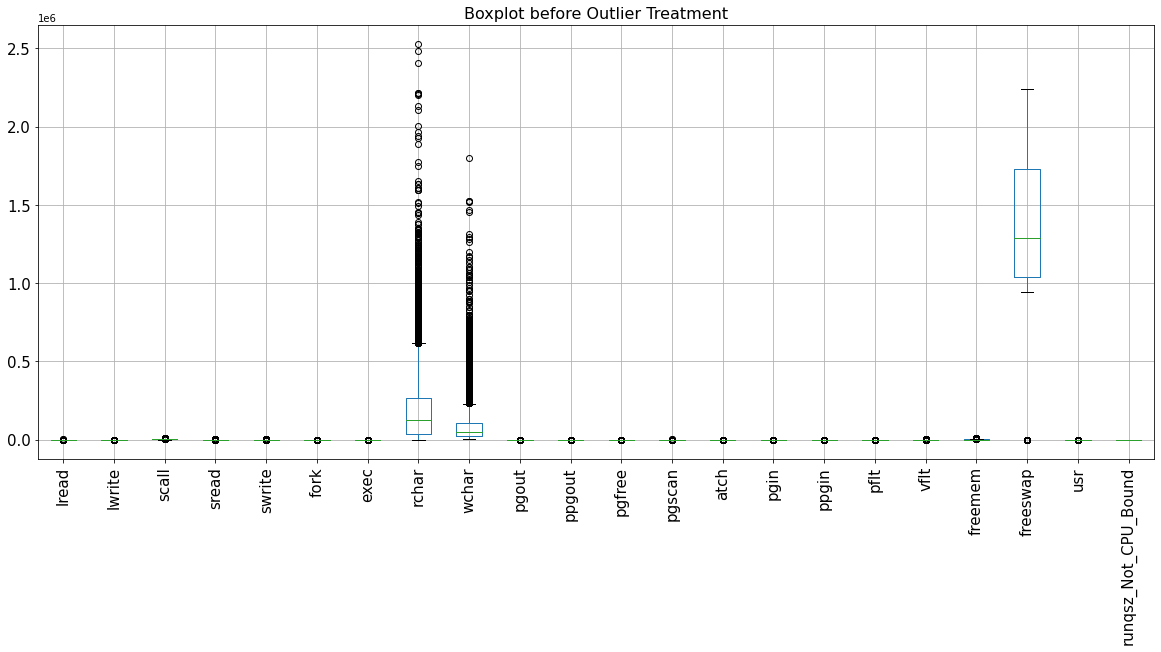

In [14]:
plt.figure(figsize=(20 ,8))
df.boxplot();
plt.xticks(rotation=90, fontsize=15);
plt.yticks(fontsize=15);
plt.title('Boxplot before Outlier Treatment', fontsize=16);

In [15]:
for column in df.columns:
    if df[column].dtype !='object':
        med=df[column].median()
        df[column]=df[column].fillna(med)

df.isna().sum()

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
dtype: int64

In [16]:
for column in df.columns:
    if df[column].dtype != 'uint8':
        print(column.upper(),':')
        print((df[column] == 0).sum())
        print('\n')

LREAD :
675


LWRITE :
2684


SCALL :
0


SREAD :
0


SWRITE :
0


FORK :
21


EXEC :
21


RCHAR :
0


WCHAR :
0


PGOUT :
4878


PPGOUT :
4878


PGFREE :
4869


PGSCAN :
6448


ATCH :
4575


PGIN :
1220


PPGIN :
1220


PFLT :
3


VFLT :
0


FREEMEM :
0


FREESWAP :
0


USR :
283




In [17]:
(6448/8192)*100

78.7109375

In [18]:
#As 78.7% of pgscan data is equal to 0, we can drop these column as it is not going to contribute much in dependent variable.
df=df.drop('pgscan',axis=1)

In [19]:
print('No of Dupliacte Rows in the Dataset =',df.duplicated().sum())

No of Dupliacte Rows in the Dataset = 0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  atch                  8192 non-null   float64
 13  pgin                  8192 non-null   float64
 14  ppgin                 8192 non-null   float64
 15  pflt                 

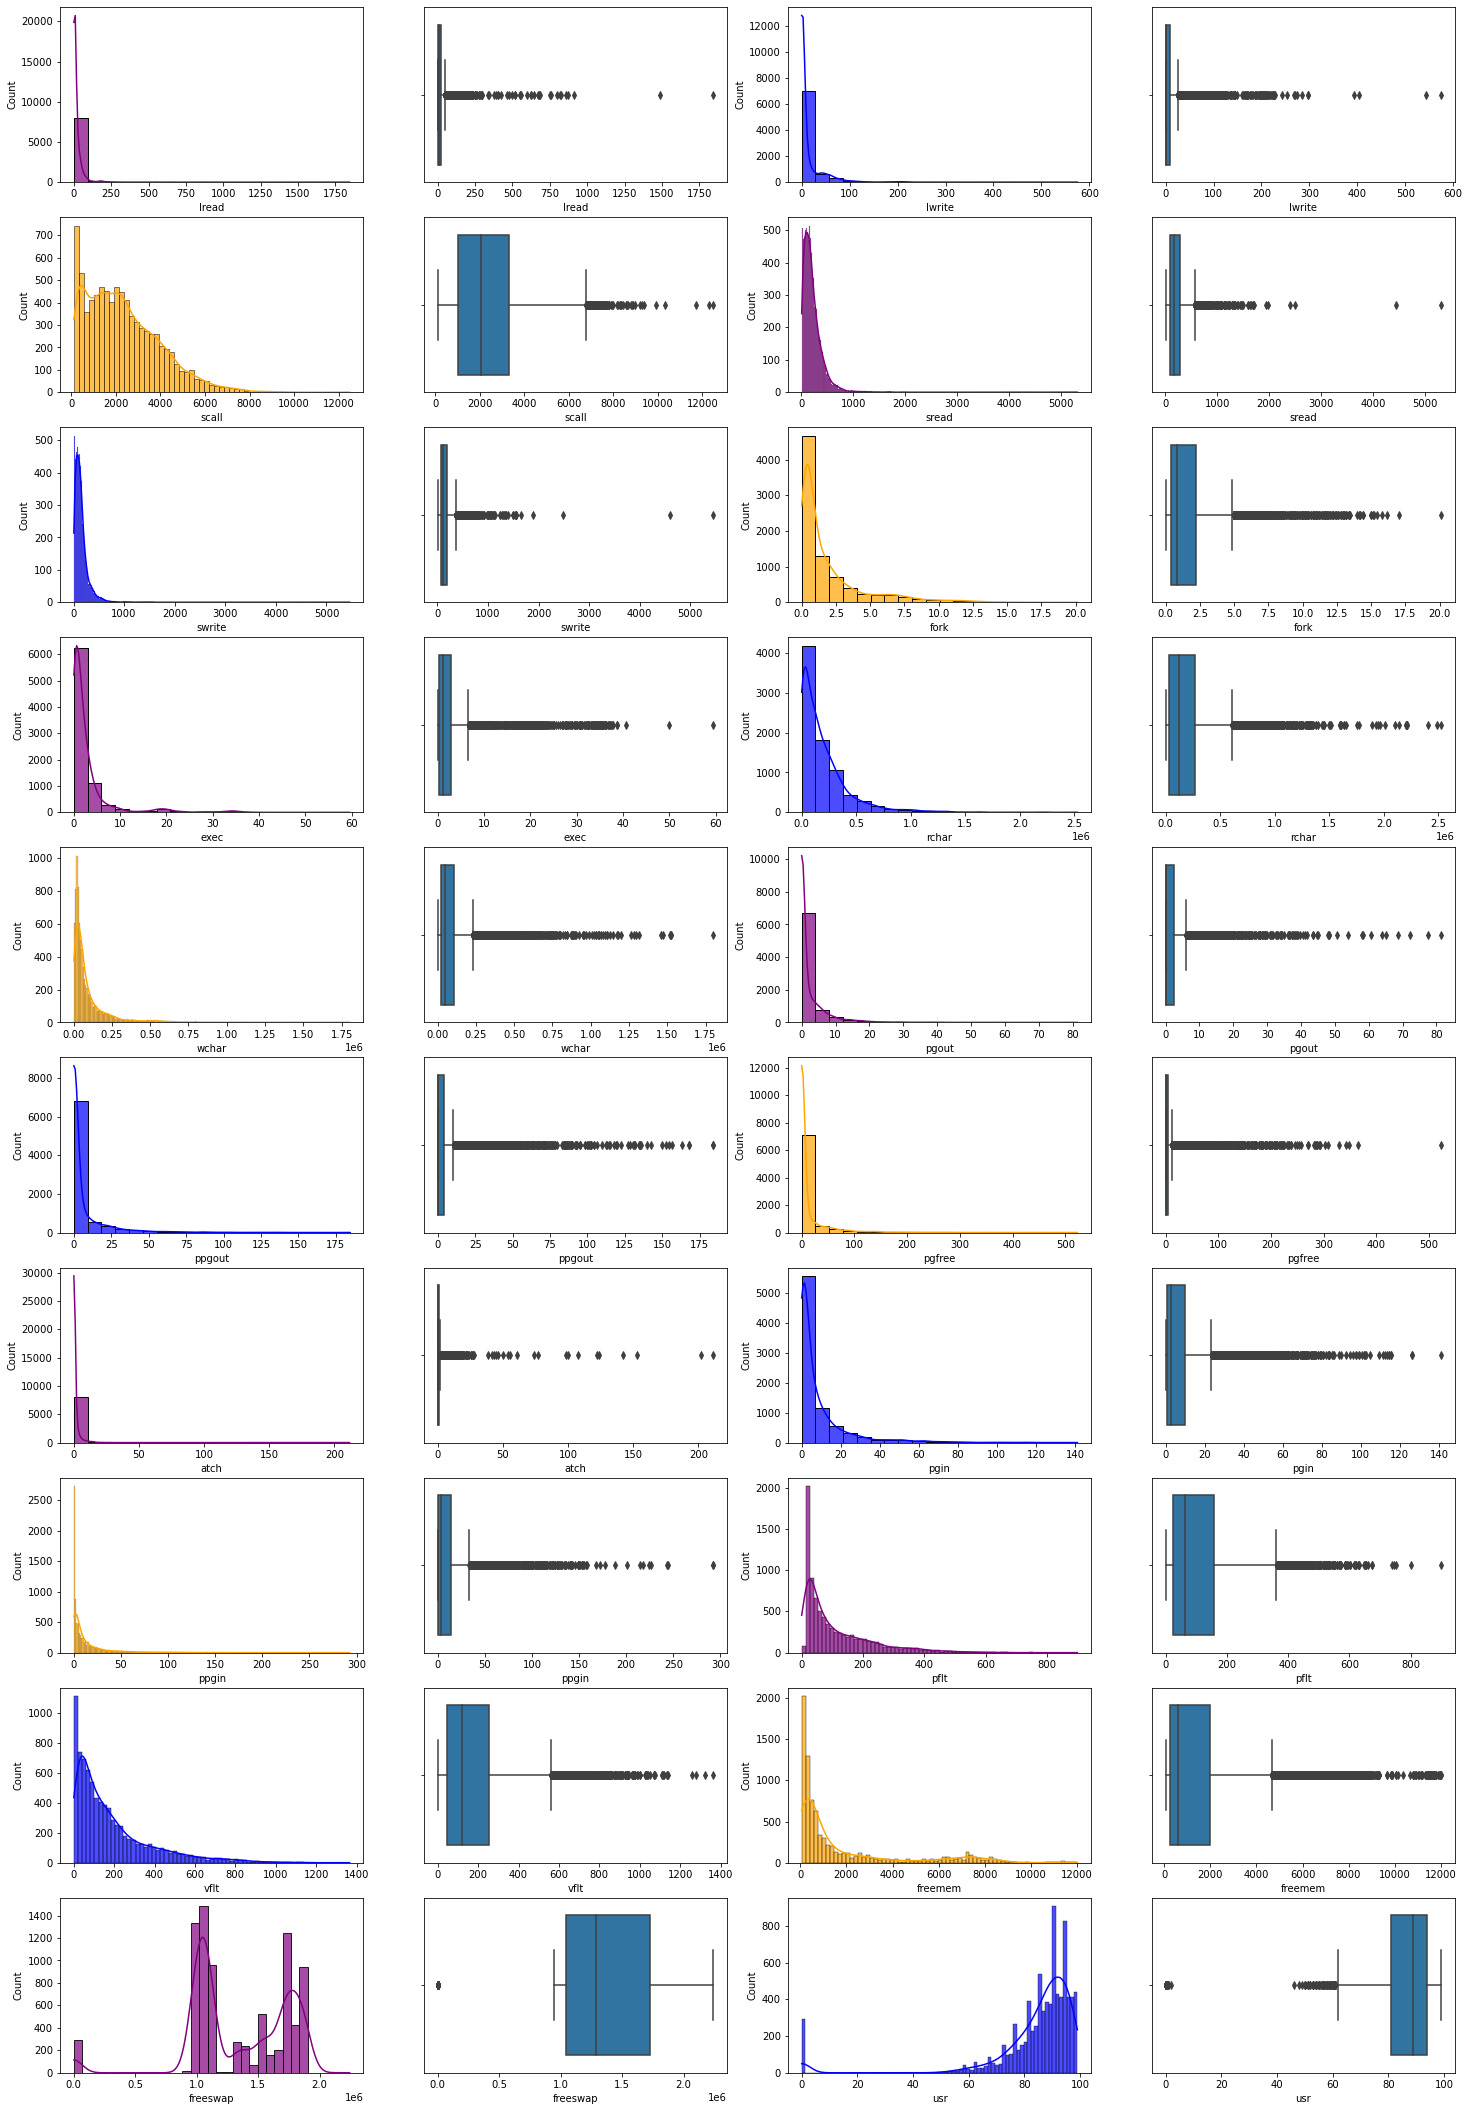

In [21]:
fig, axes = plt.subplots(nrows=10,ncols=4)
fig.set_size_inches(25,38)
sns.histplot(df['lread'],bins=20,kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[0][0]);
sns.boxplot(df['lread'],ax=axes[0][1]);
sns.histplot(df['lwrite'],bins=20,kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[0][2]);
sns.boxplot(df['lwrite'],ax=axes[0][3]);
sns.histplot(df['scall'],kde=True,color='orange',edgecolor='k',alpha=0.7,ax=axes[1][0]);
sns.boxplot(df['scall'],ax=axes[1][1]);
sns.histplot(df['sread'],kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[1][2]);
sns.boxplot(df['sread'],ax=axes[1][3]);
sns.histplot(df['swrite'],kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[2][0]);
sns.boxplot(df['swrite'],ax=axes[2][1]);
sns.histplot(df['fork'],bins=20,kde=True,color='orange',edgecolor='k',alpha=0.7,ax=axes[2][2]);
sns.boxplot(df['fork'],ax=axes[2][3]);
sns.histplot(df['exec'],bins=20,kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[3][0]);
sns.boxplot(df['exec'],ax=axes[3][1]);
sns.histplot(df['rchar'],bins=20,kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[3][2]);
sns.boxplot(df['rchar'],ax=axes[3][3]);
sns.histplot(df['wchar'],kde=True,color='orange',edgecolor='k',alpha=0.7,ax=axes[4][0]);
sns.boxplot(df['wchar'],ax=axes[4][1]);
sns.histplot(df['pgout'],bins=20,kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[4][2]);
sns.boxplot(df['pgout'],ax=axes[4][3]);
sns.histplot(df['ppgout'],bins=20,kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[5][0]);
sns.boxplot(df['ppgout'],ax=axes[5][1]);
sns.histplot(df['pgfree'],bins=20,kde=True,color='orange',edgecolor='k',alpha=0.7,ax=axes[5][2]);
sns.boxplot(df['pgfree'],ax=axes[5][3]);
sns.histplot(df['atch'],bins=20,kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[6][0]);
sns.boxplot(df['atch'],ax=axes[6][1]);
sns.histplot(df['pgin'],bins=20,kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[6][2]);
sns.boxplot(df['pgin'],ax=axes[6][3]);
sns.histplot(df['ppgin'],kde=True,color='orange',edgecolor='k',alpha=0.7,ax=axes[7][0]);
sns.boxplot(df['ppgin'],ax=axes[7][1]);
sns.histplot(df['pflt'],kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[7][2])
sns.boxplot(df['pflt'],ax=axes[7][3]);
sns.histplot(df['vflt'],kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[8][0]);
sns.boxplot(df['vflt'],ax=axes[8][1]);
sns.histplot(df['freemem'],kde=True,color='orange',edgecolor='k',alpha=0.7,ax=axes[8][2]);
sns.boxplot(df['freemem'],ax=axes[8][3]);
sns.histplot(df['freeswap'],kde=True,color='purple',edgecolor='k',alpha=0.7,ax=axes[9][0]);
sns.boxplot(df['freeswap'],ax=axes[9][1]);
sns.histplot(df['usr'],kde=True,color='blue',edgecolor='k',alpha=0.7,ax=axes[9][2]);
sns.boxplot(df['usr'],ax=axes[9][3]);

### Correlation plot

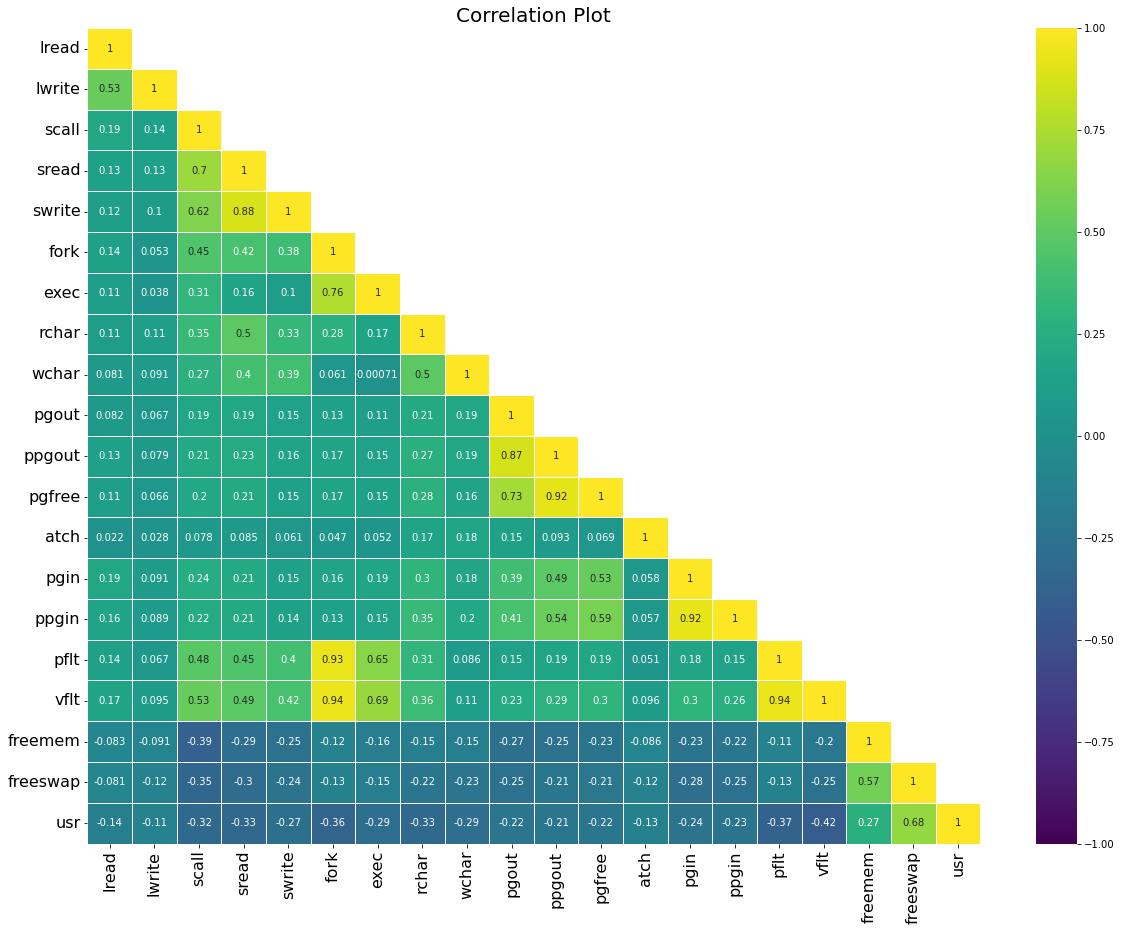

In [22]:
cor=df.iloc[:,0:20].corr(method='pearson')
plt.figure(figsize=(20,15));
mask=np.array(cor)
mask[np.tril_indices_from(cor)]=False
sns.heatmap(data=cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ="viridis",linewidth=.5)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.title('Correlation Plot', fontsize=20);

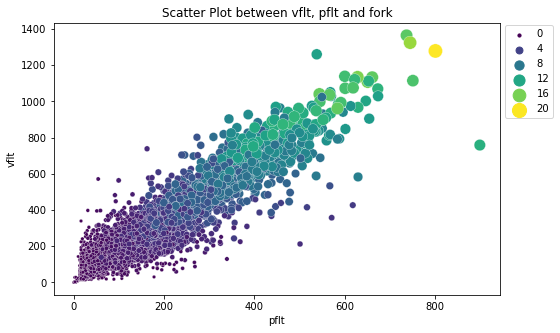

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='pflt', y='vflt', hue='fork', size='fork', sizes=(10,200), palette='viridis');
plt.legend(loc=[1.01,0.65]);
plt.title('Scatter Plot between vflt, pflt and fork');

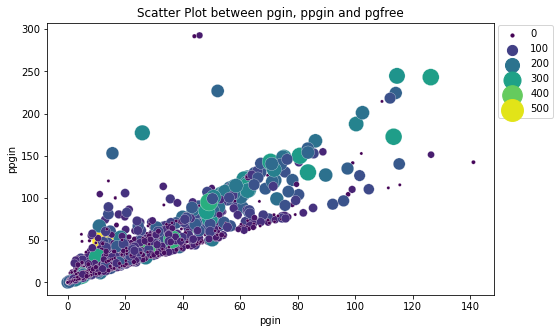

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='pgin', y='ppgin', hue='pgfree', size='pgfree', sizes=(10,500), palette='viridis');
plt.legend(loc=[1.01,0.65]);
plt.title('Scatter Plot between pgin, ppgin and pgfree');

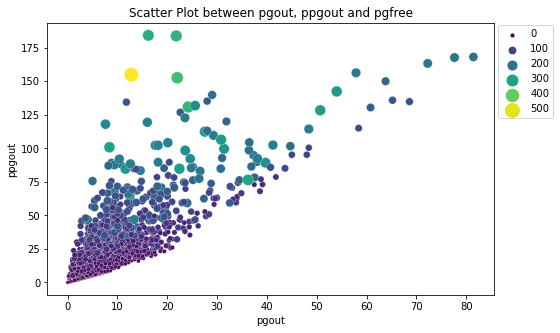

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='pgout', y='ppgout', hue='pgfree', size='pgfree', sizes=(10,200), palette='viridis');
plt.legend(loc=[1.01,0.65]);
plt.title('Scatter Plot between pgout, ppgout and pgfree');

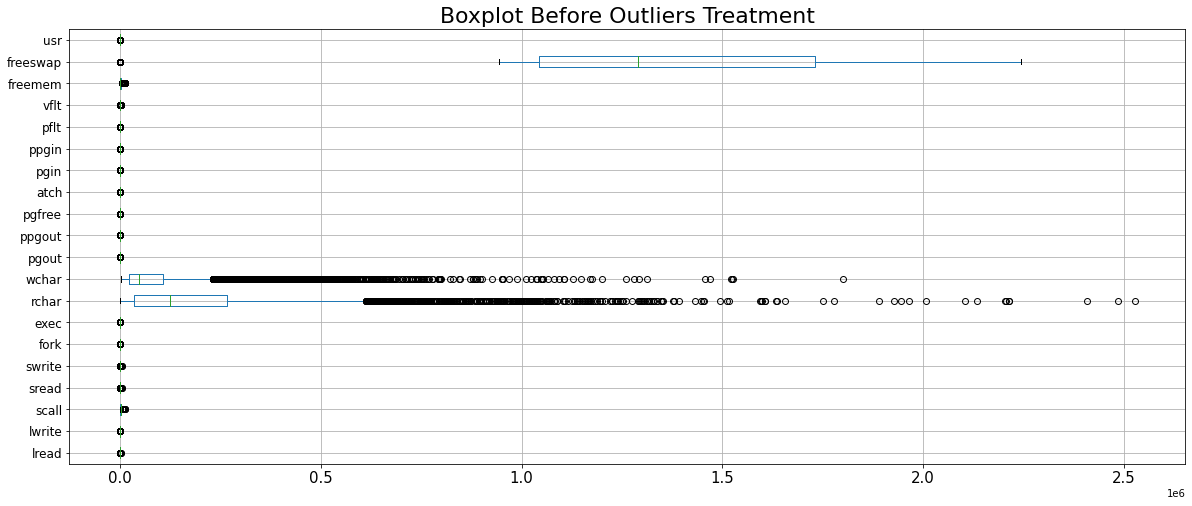

In [26]:
## Check for Outliers
# construct box plot for continuous variables
cont=df.dtypes[df.dtypes != 'uint8' ].index
plt.figure(figsize=(20,8));
df[cont].boxplot(vert=0);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);
plt.title('Boxplot Before Outliers Treatment', fontsize=22);

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q3+(1.5*IQR)
    return lr, ur

In [28]:
df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [29]:
ind=['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar','wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin','pflt', 'vflt', 'freemem', 'freeswap', 'usr']
for i in range(0,20):
    lr,ur = remove_outlier(df[ind[i]])
    df[ind[i]] =np.where(df[ind[i]]>ur,ur,df[ind[i]])
    df[ind[i]] =np.where(df[ind[i]]<lr,lr,df[ind[i]])

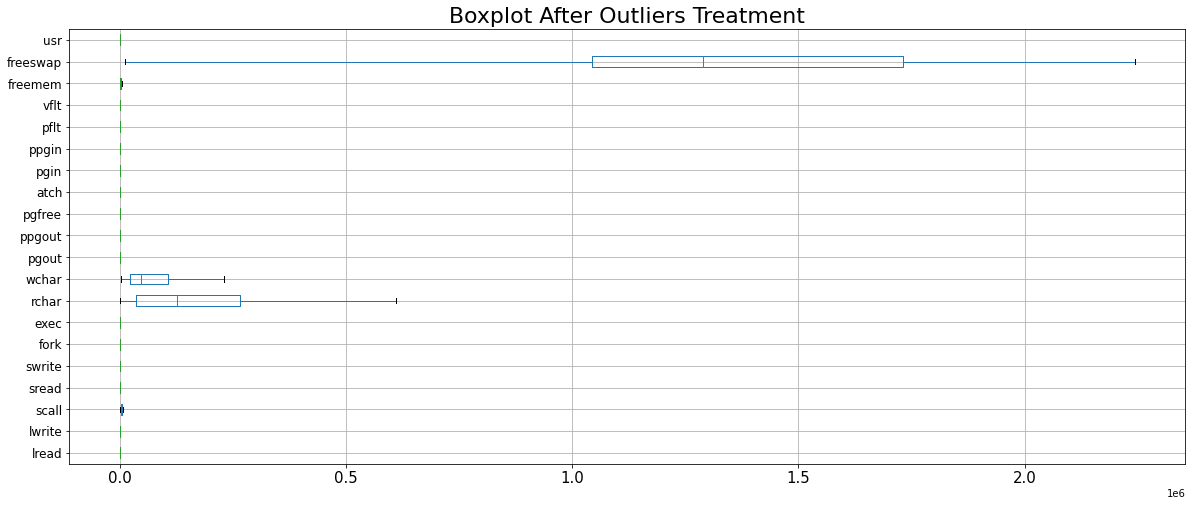

In [30]:
## Check for Outliers after treatment
# construct box plot for continuous variables
plt.figure(figsize=(20,8));
df[cont].boxplot(vert=0);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);
plt.title('Boxplot After Outliers Treatment', fontsize=22);

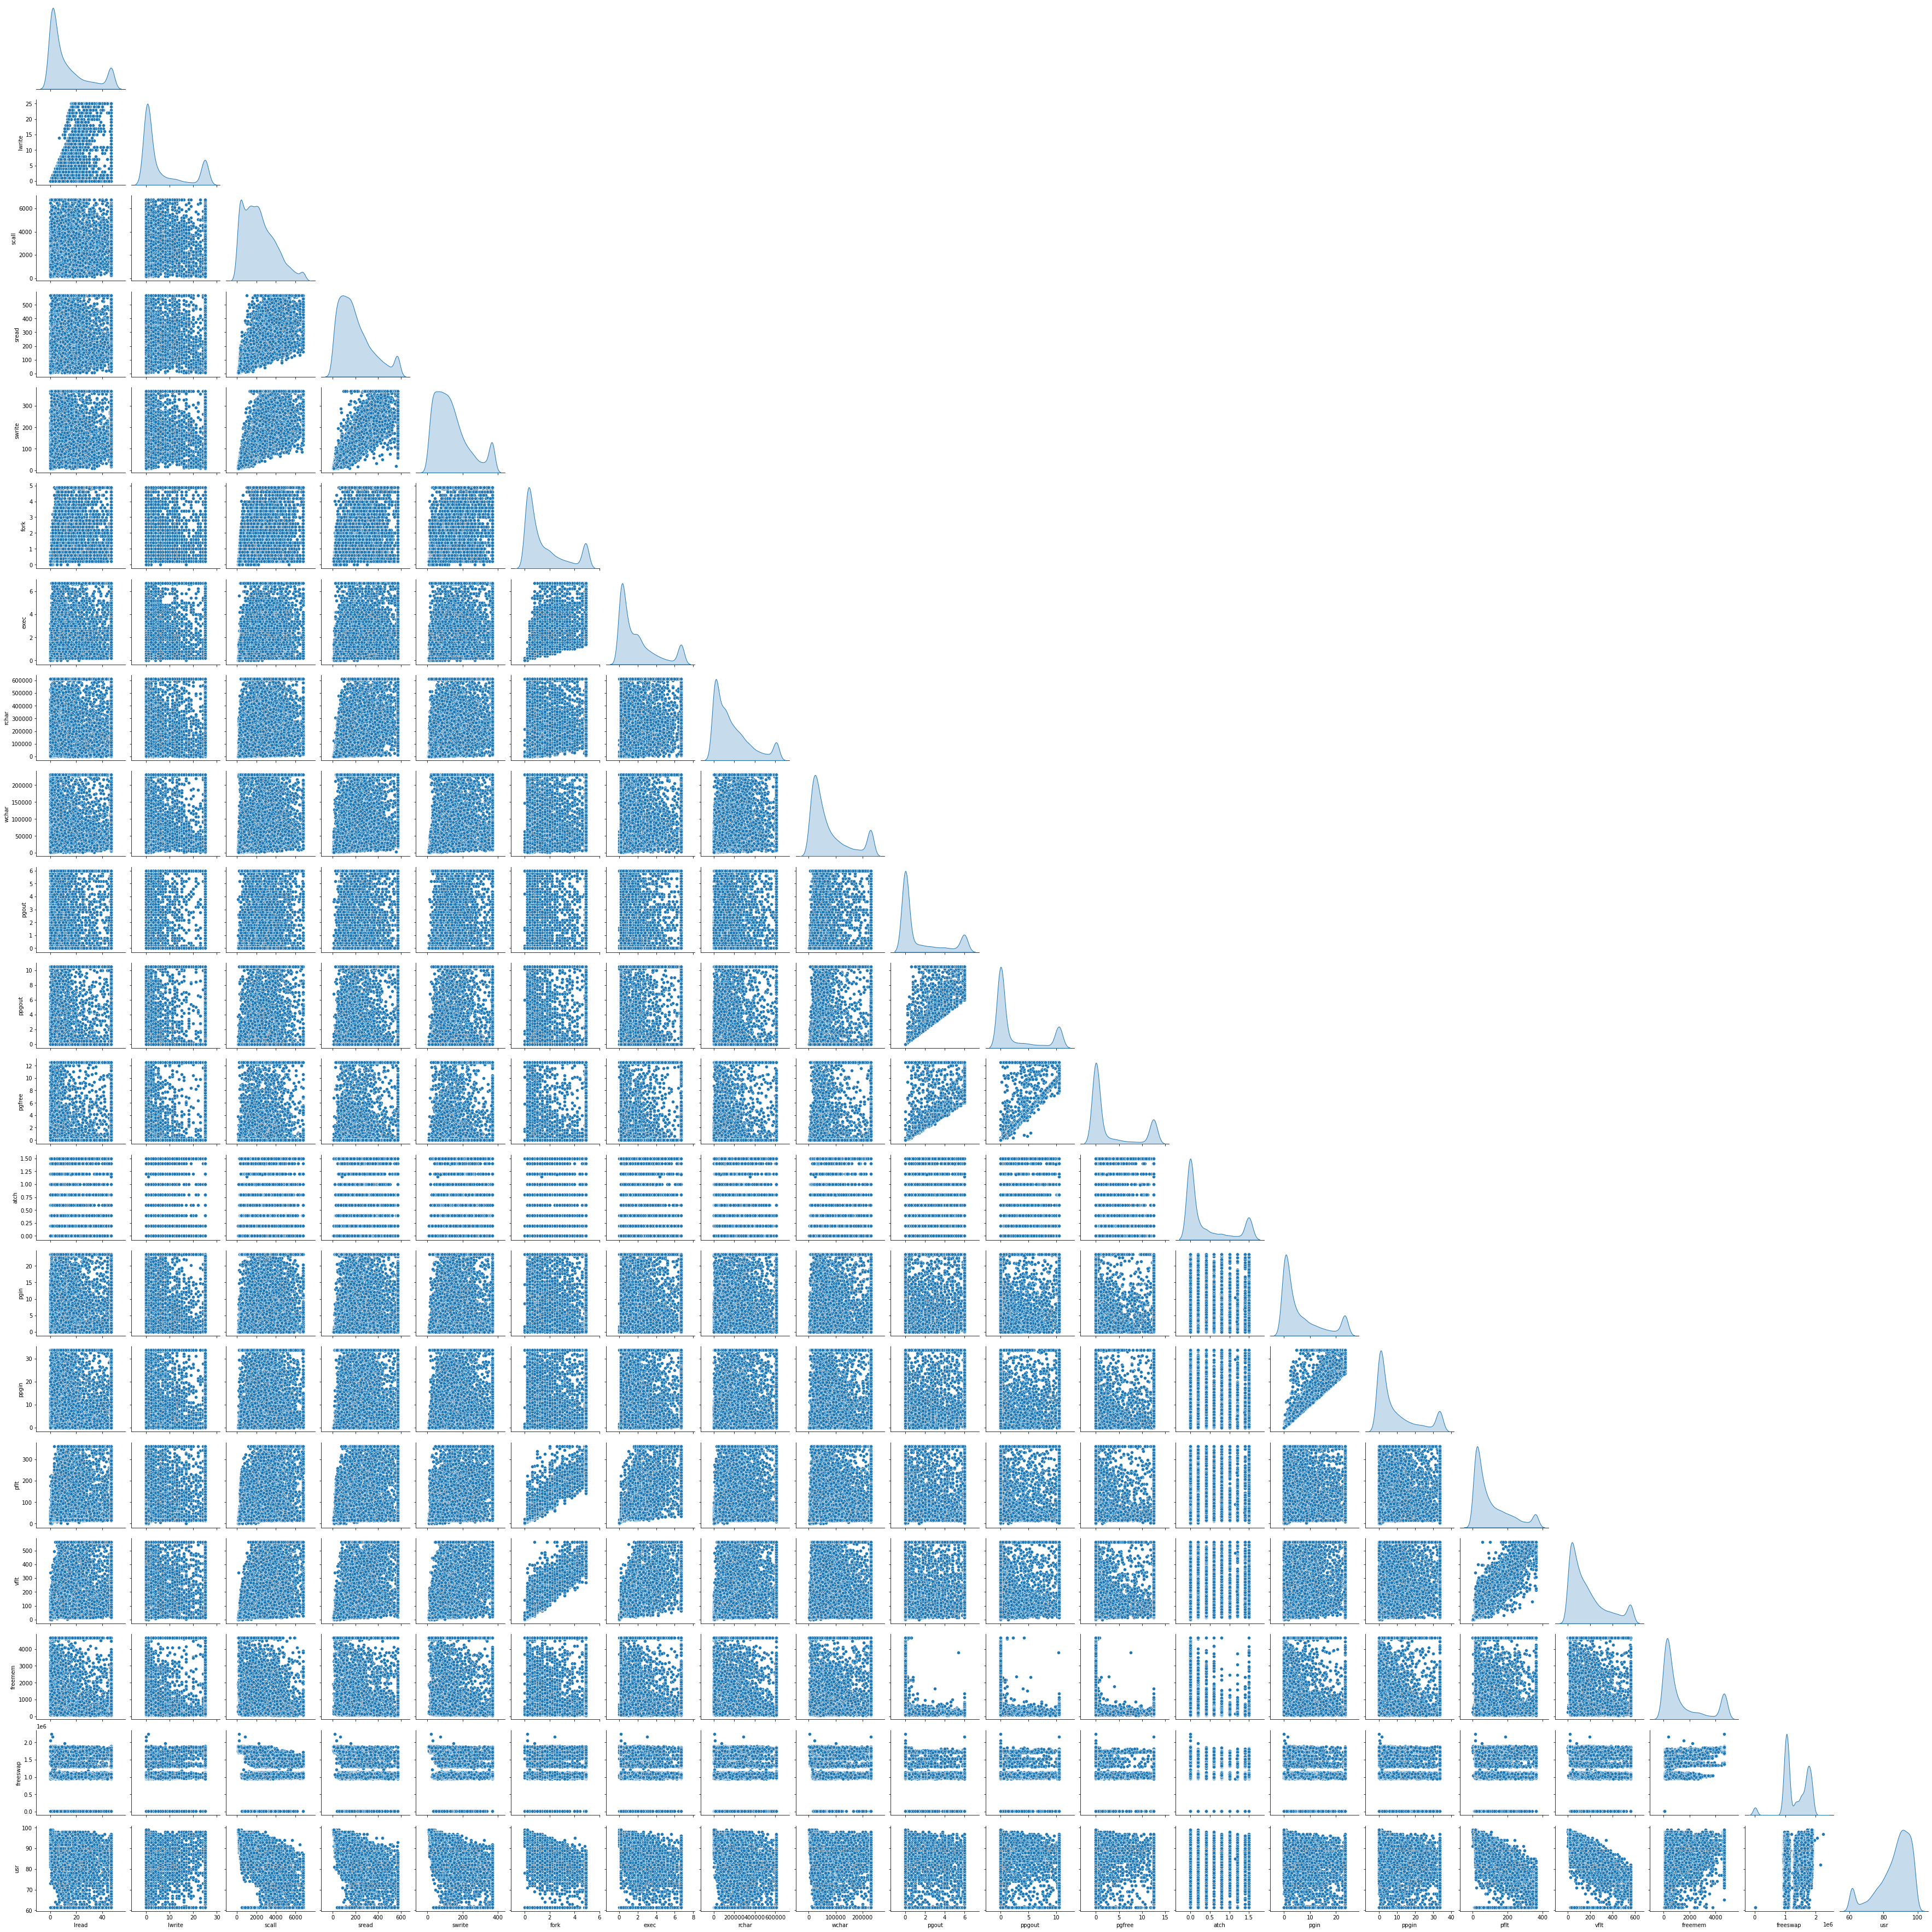

In [31]:
#Plotting a pairplot -  Checking for correlation between variables
df_pair = (df[cont])
sns.pairplot(df_pair, diag_kind='kde', corner=True)  
plt.show();

In [32]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [33]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [34]:
scaled_df = pd.DataFrame(X.fit_transform(df.iloc[:,0:22]),columns=df.columns[0:22])
scaled_df

lread    lwrite     scall     sread    swrite      fork      exec  \
0    -0.819513 -0.716521 -0.092583 -0.823008 -0.720331 -0.853341 -0.853740   
1    -0.885482 -0.716521 -1.333640 -1.238681 -1.204189 -0.853341 -0.853740   
2     0.104042 -0.393641 -0.083166 -0.277863 -0.195293  0.277935  0.231003   
3    -0.885482 -0.716521 -1.339918 -1.279567 -1.255663 -0.853341 -0.853740   
4    -0.555640 -0.608895 -1.233200 -1.095580 -1.029176 -0.727644 -0.755127   
...        ...       ...       ...       ...       ...       ...       ...   
8187  0.170010  0.574999  0.448536  1.091814  1.091564  0.026540  1.912355   
8188 -0.621609 -0.716521 -0.438472 -0.202905  0.082668  0.529330 -0.064836   
8189  0.170010 -0.178388  0.515705  0.607998  0.535642 -0.601947 -0.656514   
8190  1.225501  1.974145  1.811377  0.369497  0.422398 -0.224854 -0.360675   
8191 -0.753545 -0.716521 -0.822026 -0.986551 -0.946817  0.026540  1.414360   

         rchar     wchar     pgout  ...    pgfree      atch      pgin  \
0    -0.791696 -0.303831 -0.645830  ... -0.635071 -0.689780 -0.622761   
1    -1.022096 -0.943894 -0.645830  ... -0.635071 -0.689780 -0.830987   
2    -0.305940 -0.613197 -0.645830  ... -0.635071  1.442029 -0.050138   
3    -0.305940 -0.939894 -0.645830  ... -0.635071 -0.689780 -0.804959   
4    -0.305940 -0.890567 -0.645830  ... -0.635071 -0.689780 -0.700845   
...        ...       ...       ...  ...       ...       ...       ...   
8187  1.296642  0.135232  2.081298  ...  1.873437  0.376124  2.228963   
8188 -0.512062 -0.475473  1.081351  ...  0.328196  0.731426 -0.336450   
8189  0.842394 -0.322846 -0.464021  ... -0.514663  0.020823  2.228963   
8190 -0.666251 -0.647508 -0.009500  ...  1.873437  0.020823  2.168772   
8191 -0.388210 -0.749236 -0.645830  ... -0.635071 -0.334479 -0.388506   

         ppgin      pflt      vflt   freemem  freeswap       usr  \
0    -0.586048 -0.882744 -0.918365  2.037473  0.956433  0.898009   
1    -0.819018 -0.886387 -0.977262  2.037473  1.284547  1.103180   
2     0.023258  0.438869  0.274345 -0.427003 -0.730310  0.077327   
3    -0.801097 -0.886683 -0.977446  2.037473  1.271955  1.205765   
4    -0.711493 -0.668055 -0.787893 -0.469976  1.026087  0.385083   
...        ...       ...       ...       ...       ...       ...   
8187  2.191669  0.331328  0.585385 -0.623184 -0.812518 -0.640770   
8188 -0.424761  0.165093  0.227572 -0.700410 -0.648303  0.385083   
8189  2.191669 -0.447458  0.271883 -0.615087 -0.854208  0.077327   
8190  1.353874 -0.122570  0.167321 -0.776391 -0.727408 -0.333014   
8191 -0.263474 -0.136259 -0.403863 -0.453784  1.017200  0.795424   

      runqsz_Not_CPU_Bound  
0                -1.059118  
1                 0.944182  
2                 0.944182  
3                 0.944182  
4                 0.944182  
...                    ...  
8187             -1.059118  
8188              0.944182  
8189              0.944182  
8190             -1.059118  
8191             -1.059118  

[8192 rows x 21 columns]

### Train and Split

**Trial 1**

In [35]:
## Now dataset is ready for linear regression.We seperate the dependent and independent variables
# Copy all the predictor variables into X dataframe
x=scaled_df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = scaled_df[['usr']]

In [36]:
x.head()

lread    lwrite     scall     sread    swrite      fork      exec  \
0 -0.819513 -0.716521 -0.092583 -0.823008 -0.720331 -0.853341 -0.853740   
1 -0.885482 -0.716521 -1.333640 -1.238681 -1.204189 -0.853341 -0.853740   
2  0.104042 -0.393641 -0.083166 -0.277863 -0.195293  0.277935  0.231003   
3 -0.885482 -0.716521 -1.339918 -1.279567 -1.255663 -0.853341 -0.853740   
4 -0.555640 -0.608895 -1.233200 -1.095580 -1.029176 -0.727644 -0.755127   

      rchar     wchar    pgout    ppgout    pgfree      atch      pgin  \
0 -0.791696 -0.303831 -0.64583 -0.634297 -0.635071 -0.689780 -0.622761   
1 -1.022096 -0.943894 -0.64583 -0.634297 -0.635071 -0.689780 -0.830987   
2 -0.305940 -0.613197 -0.64583 -0.634297 -0.635071  1.442029 -0.050138   
3 -0.305940 -0.939894 -0.64583 -0.634297 -0.635071 -0.689780 -0.804959   
4 -0.305940 -0.890567 -0.64583 -0.634297 -0.635071 -0.689780 -0.700845   

      ppgin      pflt      vflt   freemem  freeswap  runqsz_Not_CPU_Bound  
0 -0.586048 -0.882744 -0.918365  2.037473  0.956433             -1.059118  
1 -0.819018 -0.886387 -0.977262  2.037473  1.284547              0.944182  
2  0.023258  0.438869  0.274345 -0.427003 -0.730310              0.944182  
3 -0.801097 -0.886683 -0.977446  2.037473  1.271955              0.944182  
4 -0.711493 -0.668055 -0.787893 -0.469976  1.026087              0.944182

In [37]:
y.head()

usr
0  0.898009
1  1.103180
2  0.077327
3  1.205765
4  0.385083

In [38]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [39]:
x_train.shape

(5734, 20)

In [40]:
x_test.shape

(2458, 20)

## **Linear Regression Model**

In [41]:
# invoke the LinearRegression function and find the bestfit model on training data
## We fit regression model on training data
## LinearRegression() -  We create an object, that is, we invoke the linear regression function
reg_model=LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

## **Model Evaluation**

In [42]:
# Let us explore the coefficients for each of the independent attributes
# Creating a proper dataframe
model_coeff = pd.DataFrame()
model_coeff["Columns"]= x_train.columns
model_coeff['Coefficient Estimate'] = round(pd.Series(reg_model.coef_[0]),4)
print(model_coeff)

                 Columns  Coefficient Estimate
0                  lread               -0.0987
1                 lwrite                0.0459
2                  scall               -0.1085
3                  sread                0.0046
4                 swrite               -0.0540
5                   fork                0.0048
6                   exec               -0.0668
7                  rchar               -0.0925
8                  wchar               -0.0395
9                  pgout               -0.0832
10                ppgout               -0.0317
11                pgfree                0.0432
12                  atch                0.0362
13                  pgin                0.0158
14                 ppgin               -0.0771
15                  pflt               -0.3500
16                  vflt               -0.0911
17               freemem               -0.0755
18              freeswap                0.3812
19  runqsz_Not_CPU_Bound                0.0827


In [43]:
# Let us check the intercept for the model

intercept = reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0029058962151628943


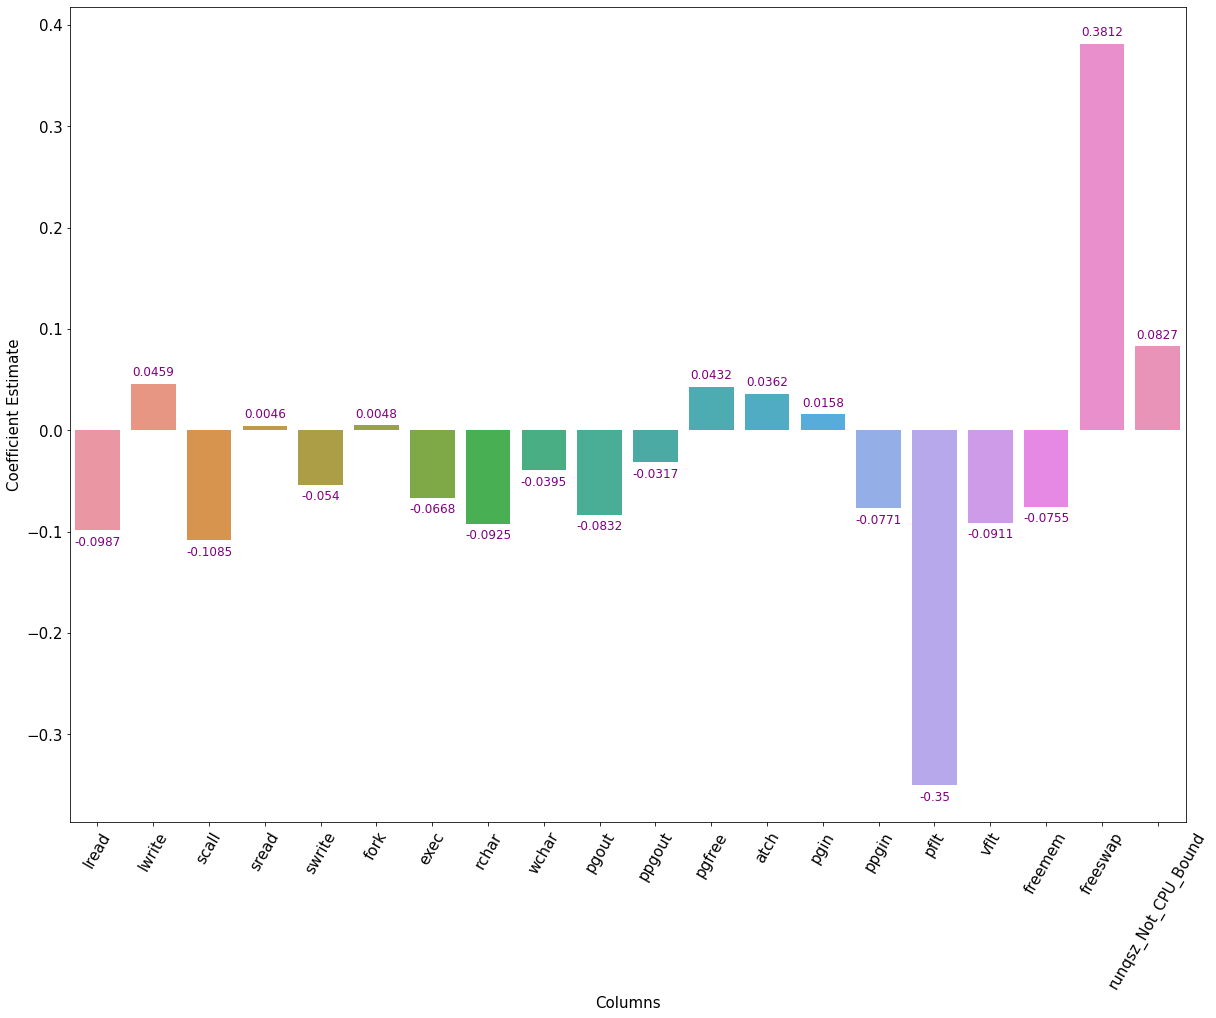

In [44]:
# Visualizing the coefficients
plt.subplots(figsize =(20, 15))
ax=sns.barplot(x ='Columns', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge', color = 'purple', rotation =0, fontsize = 12,padding =5)
plt.xticks(rotation=60, fontsize=15);
plt.yticks( fontsize=15);
plt.xlabel('Columns',fontsize=15)
plt.ylabel('Coefficient Estimate',fontsize=15)
plt.show()

In [45]:
# R square on training data
## The score here is the coefficient of determination
reg_model.score(x_train, y_train)

0.7961086101274572

**79.6% of the variation in the usr is explained by the predictors (Independent variable) in the model for train set**

In [46]:
# R square on testing data
reg_model.score(x_test, y_test)

0.7677318597936167

In [47]:
#RMSE on Training data
predicted_train=reg_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.45337923791490436

In [48]:
#RMSE on Testing data
predicted_test=reg_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.4772569420288292

**Method-2**

**Linear Regression using Stats Model**

In [49]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

lread    lwrite     scall     sread    swrite      fork      exec  \
694  -0.819513 -0.608895 -0.596036  0.158253  0.556231 -0.601947 -0.656514   
5535 -0.819513 -0.608895 -0.543305 -0.768493 -0.730626 -0.853341 -0.853740   
4244  2.215024  1.974145  0.614262  0.171882  0.432693 -0.601947 -0.755127   
2472 -0.027895  0.144492  1.289718  0.682955  0.545936  0.780725  0.526842   
7052  0.235978  1.758892 -1.299114 -1.272752 -1.286548 -0.727644 -0.163449   

         rchar     wchar     pgout  ...    pgfree      atch      pgin  \
694   0.113524  2.174900 -0.373117  ...  1.873437  1.974981 -0.336450   
5535 -0.983632 -0.712946 -0.645830  ... -0.635071 -0.689780 -0.622761   
4244 -0.547823 -0.307900  1.804040  ...  0.807823  1.974981 -0.311723   
2472 -0.474715 -0.072672 -0.645830  ... -0.635071 -0.689780 -0.466591   
7052 -0.926529 -0.885950 -0.645830  ... -0.635071 -0.689780 -0.830987   

         ppgin      pflt      vflt   freemem  freeswap  runqsz_Not_CPU_Bound  \
694  -0.155950 -0.762597 -0.732504 -0.788847  0.111528             -1.059118   
5535 -0.675652 -0.885009 -0.891655  0.055040 -0.729587              0.944182   
4244 -0.407736 -0.450610 -0.625111 -0.813136 -3.131333             -1.059118   
2472 -0.532286  0.230090  0.376507 -0.383408 -0.795259             -1.059118   
7052 -0.819018 -0.845321 -0.934366  1.738454  1.172083              0.944182   

           usr  
694   0.487668  
5535  0.795424  
4244 -2.538597  
2472 -0.333014  
7052  0.795424  

[5 rows x 21 columns]

In [50]:
## Checking the column names
data_train.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt',
       'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound', 'usr'],
      dtype='object')

In [51]:
equation= 'usr ~ lread + lwrite + scall + sread + swrite + fork + exec + rchar + wchar + pgout + ppgout + pgfree + atch + pgin + ppgin +  pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [52]:
import statsmodels.formula.api as sm
lm1 = sm.ols(formula= equation, data = data_train).fit()

In [53]:
## Checking the training summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:12   Log-Likelihood:                -3600.4
No. Observations:                5734   AIC:                             7243.
Df Residuals:                    5713   BIC:                             7383.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0029 

In [54]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    5.349939
lwrite                   4.327692
scall                    2.960569
sread                    6.420389
swrite                   5.597247
fork                    13.035313
exec                     3.241417
rchar                    2.133562
wchar                    1.584323
pgout                   11.360571
ppgout                  29.404850
pgfree                  16.497075
atch                     1.875947
pgin                    13.811056
ppgin                   13.953554
pflt                    12.000708
vflt                    15.968268
freemem                  1.961202
freeswap                 1.841210
runqsz_Not_CPU_Bound     1.156810
dtype: float64



In [55]:
# To build linear regression_model
import statsmodels.api as smf

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Iteration 1**

In [56]:
x_train = x_train.drop(['fork'], axis=1)

In [57]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

lread    lwrite     scall     sread    swrite      exec     rchar  \
694  -0.819513 -0.608895 -0.596036  0.158253  0.556231 -0.656514  0.113524   
5535 -0.819513 -0.608895 -0.543305 -0.768493 -0.730626 -0.853740 -0.983632   
4244  2.215024  1.974145  0.614262  0.171882  0.432693 -0.755127 -0.547823   
2472 -0.027895  0.144492  1.289718  0.682955  0.545936  0.526842 -0.474715   
7052  0.235978  1.758892 -1.299114 -1.272752 -1.286548 -0.163449 -0.926529   

         wchar     pgout    ppgout    pgfree      atch      pgin     ppgin  \
694   2.174900 -0.373117  0.901470  1.873437  1.974981 -0.336450 -0.155950   
5535 -0.712946 -0.645830 -0.634297 -0.635071 -0.689780 -0.622761 -0.675652   
4244 -0.307900  1.804040  1.146697  0.807823  1.974981 -0.311723 -0.407736   
2472 -0.072672 -0.645830 -0.634297 -0.635071 -0.689780 -0.466591 -0.532286   
7052 -0.885950 -0.645830 -0.634297 -0.635071 -0.689780 -0.830987 -0.819018   

          pflt      vflt   freemem  freeswap  runqsz_Not_CPU_Bound       usr  
694  -0.762597 -0.732504 -0.788847  0.111528             -1.059118  0.487668  
5535 -0.885009 -0.891655  0.055040 -0.729587              0.944182  0.795424  
4244 -0.450610 -0.625111 -0.813136 -3.131333             -1.059118 -2.538597  
2472  0.230090  0.376507 -0.383408 -0.795259             -1.059118 -0.333014  
7052 -0.845321 -0.934366  1.738454  1.172083              0.944182  0.795424

In [58]:
equation1= 'usr ~ lread + lwrite + scall + sread + swrite + exec + rchar + wchar + pgout + ppgout + pgfree + atch + pgin + ppgin +  pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [59]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation1, data = data_train).fit()

In [60]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:12   Log-Likelihood:                -3600.5
No. Observations:                5734   AIC:                             7241.
Df Residuals:                    5714   BIC:                             7374.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0029 

In [61]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    5.345130
lwrite                   4.316369
scall                    2.916158
sread                    6.403342
swrite                   5.424296
exec                     2.978791
rchar                    2.133402
wchar                    1.584259
pgout                   11.355553
ppgout                  29.386690
pgfree                  16.495775
atch                     1.869646
pgin                    13.793681
ppgin                   13.939341
pflt                    10.335504
vflt                    12.364293
freemem                  1.961187
freeswap                 1.817450
runqsz_Not_CPU_Bound     1.156486
dtype: float64



**Iteration 2**

In [62]:
x_train = x_train.drop(['sread'], axis=1)

In [63]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

lread    lwrite     scall    swrite      exec     rchar     wchar  \
694  -0.819513 -0.608895 -0.596036  0.556231 -0.656514  0.113524  2.174900   
5535 -0.819513 -0.608895 -0.543305 -0.730626 -0.853740 -0.983632 -0.712946   
4244  2.215024  1.974145  0.614262  0.432693 -0.755127 -0.547823 -0.307900   
2472 -0.027895  0.144492  1.289718  0.545936  0.526842 -0.474715 -0.072672   
7052  0.235978  1.758892 -1.299114 -1.286548 -0.163449 -0.926529 -0.885950   

         pgout    ppgout    pgfree      atch      pgin     ppgin      pflt  \
694  -0.373117  0.901470  1.873437  1.974981 -0.336450 -0.155950 -0.762597   
5535 -0.645830 -0.634297 -0.635071 -0.689780 -0.622761 -0.675652 -0.885009   
4244  1.804040  1.146697  0.807823  1.974981 -0.311723 -0.407736 -0.450610   
2472 -0.645830 -0.634297 -0.635071 -0.689780 -0.466591 -0.532286  0.230090   
7052 -0.645830 -0.634297 -0.635071 -0.689780 -0.830987 -0.819018 -0.845321   

          vflt   freemem  freeswap  runqsz_Not_CPU_Bound       usr  
694  -0.732504 -0.788847  0.111528             -1.059118  0.487668  
5535 -0.891655  0.055040 -0.729587              0.944182  0.795424  
4244 -0.625111 -0.813136 -3.131333             -1.059118 -2.538597  
2472  0.376507 -0.383408 -0.795259             -1.059118 -0.333014  
7052 -0.934366  1.738454  1.172083              0.944182  0.795424

In [64]:
equation2= 'usr ~ lread + lwrite + scall + swrite + exec + rchar + wchar + pgout + ppgout + pgfree + atch + pgin + ppgin +  pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [65]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation2, data = data_train).fit()

In [66]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1240.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:13   Log-Likelihood:                -3600.5
No. Observations:                5734   AIC:                             7239.
Df Residuals:                    5715   BIC:                             7365.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0029 

In [67]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    5.335558
lwrite                   4.305901
scall                    2.658770
swrite                   3.097114
exec                     2.967615
rchar                    1.727344
wchar                    1.573574
pgout                   11.355068
ppgout                  29.386290
pgfree                  16.495752
atch                     1.867962
pgin                    13.791631
ppgin                   13.939217
pflt                    10.334580
vflt                    12.307402
freemem                  1.960754
freeswap                 1.806395
runqsz_Not_CPU_Bound     1.156471
dtype: float64



**Iteration 3**

In [68]:
x_train = x_train.drop(['pgin'], axis=1)

In [69]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

lread    lwrite     scall    swrite      exec     rchar     wchar  \
694  -0.819513 -0.608895 -0.596036  0.556231 -0.656514  0.113524  2.174900   
5535 -0.819513 -0.608895 -0.543305 -0.730626 -0.853740 -0.983632 -0.712946   
4244  2.215024  1.974145  0.614262  0.432693 -0.755127 -0.547823 -0.307900   
2472 -0.027895  0.144492  1.289718  0.545936  0.526842 -0.474715 -0.072672   
7052  0.235978  1.758892 -1.299114 -1.286548 -0.163449 -0.926529 -0.885950   

         pgout    ppgout    pgfree      atch     ppgin      pflt      vflt  \
694  -0.373117  0.901470  1.873437  1.974981 -0.155950 -0.762597 -0.732504   
5535 -0.645830 -0.634297 -0.635071 -0.689780 -0.675652 -0.885009 -0.891655   
4244  1.804040  1.146697  0.807823  1.974981 -0.407736 -0.450610 -0.625111   
2472 -0.645830 -0.634297 -0.635071 -0.689780 -0.532286  0.230090  0.376507   
7052 -0.645830 -0.634297 -0.635071 -0.689780 -0.819018 -0.845321 -0.934366   

       freemem  freeswap  runqsz_Not_CPU_Bound       usr  
694  -0.788847  0.111528             -1.059118  0.487668  
5535  0.055040 -0.729587              0.944182  0.795424  
4244 -0.813136 -3.131333             -1.059118 -2.538597  
2472 -0.383408 -0.795259             -1.059118 -0.333014  
7052  1.738454  1.172083              0.944182  0.795424

In [70]:
equation3= 'usr ~ lread + lwrite + scall + swrite + exec + rchar + wchar + pgout + ppgout + pgfree + atch + ppgin +  pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [71]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation3, data = data_train).fit()

In [72]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1313.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:14   Log-Likelihood:                -3600.8
No. Observations:                5734   AIC:                             7238.
Df Residuals:                    5716   BIC:                             7357.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0029 

In [73]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    5.332660
lwrite                   4.305806
scall                    2.656948
swrite                   3.096983
exec                     2.966343
rchar                    1.714116
wchar                    1.572392
pgout                   11.320373
ppgout                  29.334367
pgfree                  16.495662
atch                     1.867881
ppgin                    1.668470
pflt                    10.262938
vflt                    12.154258
freemem                  1.960754
freeswap                 1.798353
runqsz_Not_CPU_Bound     1.156387
dtype: float64



**Iteration 4**

In [74]:
x_train = x_train.drop(['ppgout'], axis=1)

In [75]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [76]:
equation4= 'usr ~ lread + lwrite + scall + swrite + exec + rchar + wchar + pgout + pgfree + atch + ppgin +  pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [77]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation4, data = data_train).fit()

In [78]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:15   Log-Likelihood:                -3601.3
No. Observations:                5734   AIC:                             7237.
Df Residuals:                    5717   BIC:                             7350.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0029 

In [79]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    5.332480
lwrite                   4.305771
scall                    2.656529
swrite                   3.096943
exec                     2.965308
rchar                    1.714077
wchar                    1.569088
pgout                    6.444261
pgfree                   6.154996
atch                     1.867585
ppgin                    1.661057
pflt                    10.262491
vflt                    12.154255
freemem                  1.958713
freeswap                 1.795330
runqsz_Not_CPU_Bound     1.155996
dtype: float64



**Iteration 5**

In [80]:
x_train = x_train.drop(['pgfree'], axis=1)

In [81]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [82]:
equation5= 'usr ~ lread + lwrite + scall + swrite + exec + rchar + wchar + pgout + atch + ppgin +  pflt + vflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [83]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation5, data = data_train).fit()

In [84]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1487.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:15   Log-Likelihood:                -3602.5
No. Observations:                5734   AIC:                             7237.
Df Residuals:                    5718   BIC:                             7344.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0029 

In [85]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                    5.330293
lwrite                   4.302042
scall                    2.653249
swrite                   3.096467
exec                     2.964211
rchar                    1.714054
wchar                    1.569001
pgout                    2.050749
atch                     1.866731
ppgin                    1.628857
pflt                    10.240301
vflt                    12.115896
freemem                  1.947198
freeswap                 1.793055
runqsz_Not_CPU_Bound     1.155696
dtype: float64



**Iteration 6**

In [86]:
x_train = x_train.drop(['vflt'], axis=1)

In [87]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [88]:
equation6= 'usr ~ lread + lwrite + scall + swrite + exec + rchar + wchar + pgout + atch + ppgin +  pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [89]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation6, data = data_train).fit()

In [90]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1588.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:16   Log-Likelihood:                -3610.9
No. Observations:                5734   AIC:                             7252.
Df Residuals:                    5719   BIC:                             7352.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0032 

In [91]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                   5.302312
lwrite                  4.293486
scall                   2.652839
swrite                  3.012205
exec                    2.842850
rchar                   1.694991
wchar                   1.536883
pgout                   2.045326
atch                    1.860518
ppgin                   1.518635
pflt                    3.441292
freemem                 1.945752
freeswap                1.757301
runqsz_Not_CPU_Bound    1.155441
dtype: float64



**Iteration 7**

In [92]:
x_train = x_train.drop(['lread'], axis=1)

In [93]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)

In [94]:
equation7= 'usr ~ lwrite + scall + swrite + exec + rchar + wchar + pgout + atch + ppgin +  pflt + freemem + freeswap + runqsz_Not_CPU_Bound'

In [95]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= equation7, data = data_train).fit()

In [96]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1690.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:02:16   Log-Likelihood:                -3638.1
No. Observations:                5734   AIC:                             7304.
Df Residuals:                    5720   BIC:                             7397.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0027 

In [97]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lwrite                  1.052269
scall                   2.646513
swrite                  3.011516
exec                    2.814596
rchar                   1.694988
wchar                   1.533738
pgout                   2.045318
atch                    1.859900
ppgin                   1.466065
pflt                    3.255990
freemem                 1.945486
freeswap                1.750984
runqsz_Not_CPU_Bound    1.144465
dtype: float64



In [98]:
# invoke the LinearRegression function and find the bestfit model on training data
## We fit regression model on training data
## LinearRegression() -  We create an object, that is, we invoke the linear regression function
reg_model=LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [99]:
# Let us explore the coefficients for each of the independent attributes
# Creating a proper dataframe
model_coeff = pd.DataFrame()
model_coeff["Columns"]= x_train.columns
model_coeff['Coefficient Estimate'] = round(pd.Series(reg_model.coef_[0]),4)
print(model_coeff)

                 Columns  Coefficient Estimate
0                 lwrite               -0.0323
1                  scall               -0.1124
2                 swrite               -0.0590
3                   exec               -0.0820
4                  rchar               -0.0952
5                  wchar               -0.0331
6                  pgout               -0.0773
7                   atch                0.0334
8                  ppgin               -0.0799
9                   pflt               -0.4333
10               freemem               -0.0770
11              freeswap                0.3892
12  runqsz_Not_CPU_Bound                0.0867


In [100]:
# Let us check the intercept for the model

intercept = reg_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.002688923454281225


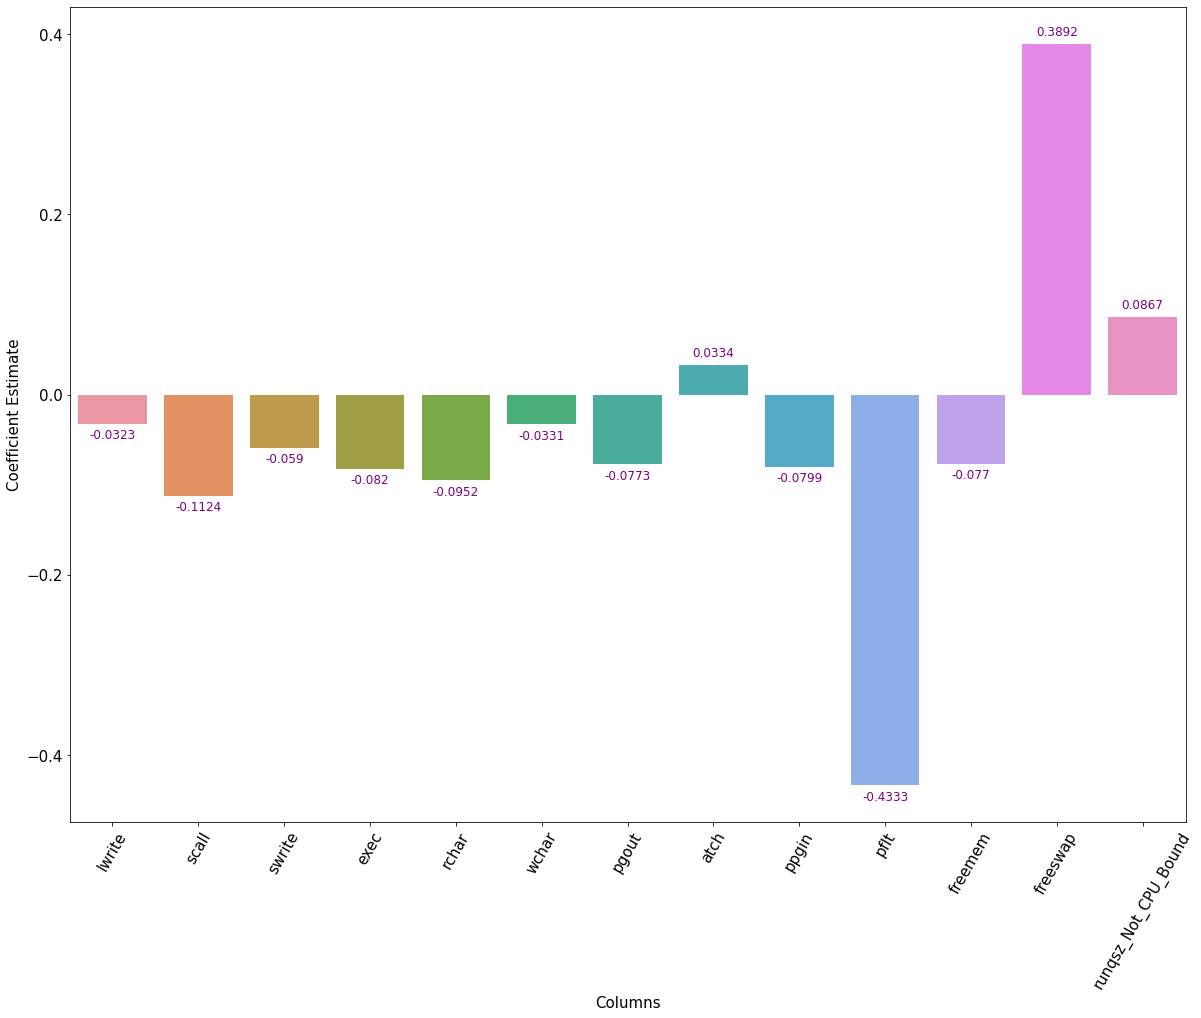

In [101]:
# Visualizing the coefficients
plt.subplots(figsize =(20, 15))
ax=sns.barplot(x ='Columns', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge', color = 'purple', rotation =0, fontsize = 12,padding =5)
plt.xticks(rotation=60, fontsize=15);
plt.yticks( fontsize=15);
plt.xlabel('Columns',fontsize=15)
plt.ylabel('Coefficient Estimate',fontsize=15)
plt.show()

In [102]:
# R square on training data
## The score here is the coefficient of determination
reg_model.score(x_train, y_train)

0.7934108051768877

In [103]:
x_test = x_test.drop(['fork','sread','pgin','ppgout','pgfree','vflt','lread'], axis=1)

In [104]:
# R square on testing data
reg_model.score(x_test, y_test)

0.7648391702411479

In [105]:
#RMSE on Training data
predicted_train=reg_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.4563688426261858

In [106]:
#RMSE on Testing data
predicted_test=reg_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.4802196478352826

## Cross Checking Assumptions

In [107]:
# Creating the dataframe for the necessary columns
df_pred = pd.DataFrame()
df_pred["Actual data"] = y_train['usr']
df_pred["Predicted Values"] = lm1.fittedvalues.values
df_pred["Residuals"] = lm1.resid.values
df_pred.head()

Actual data  Predicted Values  Residuals
694      0.487668          0.472238   0.015430
5535     0.795424          0.566217   0.229207
4244    -2.538597         -1.130275  -1.408322
2472    -0.333014         -0.582212   0.249198
7052     0.795424          1.155905  -0.360481

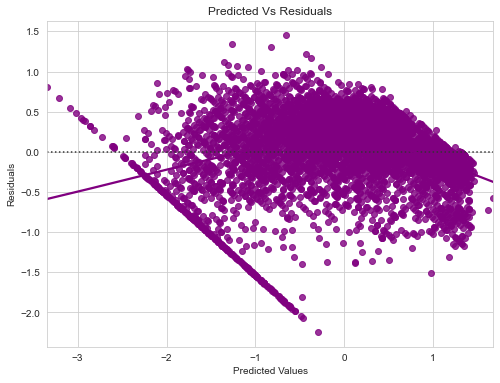

In [108]:
# Residual Plots -  Checking pattern in residual
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.residplot(data = df_pred, x = "Predicted Values", y = 'Residuals', color ='purple', lowess=True)


plt.title("Predicted Vs Residuals")
plt.xlabel ("Predicted Values")
plt.ylabel ("Residuals")
plt.show();

Skew : -1.0738904257401776


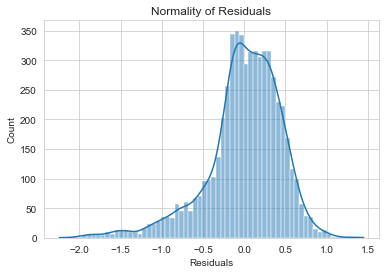

In [109]:
# Test for Normality
sns.histplot(df_pred["Residuals"], kde =True)
print("Skew :",df_pred["Residuals"].skew())
plt.title("Normality of Residuals")
plt.show()

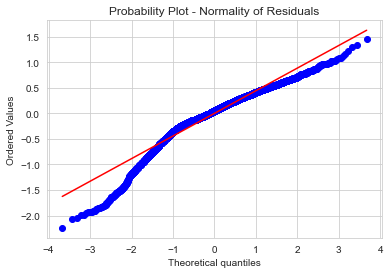

In [110]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist ="norm", plot =pylab)
plt.title("Probability Plot - Normality of Residuals")
plt.show()

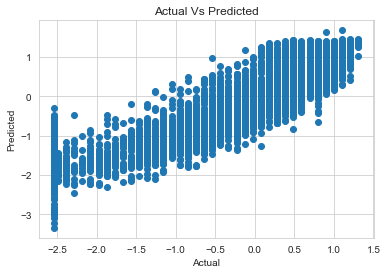

In [111]:

plt.scatter(df_pred["Actual data"], df_pred["Predicted Values"])
plt.title("Actual Vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [112]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (-0.03) * lwrite + (-0.11) * scall + (-0.06) * swrite + (-0.08) * exec + (-0.1) * rchar + (-0.03) * wchar + (-0.08) * pgout + (0.03) * atch + (-0.08) * ppgin + (-0.43) * pflt + (-0.08) * freemem + (0.39) * freeswap + (0.09) * runqsz_Not_CPU_Bound + 